# <center>Biomarker Identification from Multi-input, Multi-modal Analysis
## <center>*by Cooper Mellema*
### <center>*Montillo Lab 04/2019*
### <center>*author email: Cooper.Mellema@UTSouthwestern.edu*
### <center>*status: prototype*

In [3]:
import os
import sys
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from mpl_toolkits.mplot3d import Axes3D
import sklearn as sk
import pickle as pkl
import sklearn.metrics as skm
import seaborn as sb
import pandas as pd
import numpy as np
import keras as k

In [5]:
from IMPAC_DenseNetwork import read_config_file
from IMPAC_DenseNetwork import format_dict
from IMPAC_DenseNetwork import metrics_from_string
from IMPAC_DenseNetwork import get_optimizer_from_config
from IMPAC_DenseNetwork import add_layer_from_config
from IMPAC_DenseNetwork import network_from_ini_2


sDataPath = '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/TrainTestDataWithConfounds.p'
sWeightsPath = '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/ISBIRerun/Dense/Dense_47_combinedbasc122weights.h5'
sInputName = 'combined'
iModelNum='47'
sSubInputName='basc122'
b2Atlas=False

sIni = 'Dense_' + str(iModelNum)
sIniPath = '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/IniFiles/' + sIni + '.ini'
sSavePath = '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels'
if b2Atlas==True:
    sDataPath = '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/TrainTestData2Atlas.p'
else:
    sDataPath = '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/TrainTestDataWithConfounds.p'

# Load the data which was used to train the model
# required for generating correct input size
[dXData, dXTest, aYData, aYTest] = pkl.load(open(sDataPath, 'rb'))

if sInputName =='anatomy':
    aXData = dXData[sInputName]
    aXTest = dXTest[sInputName]

elif sInputName =='AllAtlases':
    aXData = dXData['anatomy']
    aXTest = dXTest['anatomy']

    for key in dXData['connectivity'].keys():
        if (not key=='basc064') and (not key=='basc197'):
            aXData = np.append(aXData, np.array(dXData['connectivity'][key]), axis=1)
            aXTest = np.append(aXTest, np.array(dXTest['connectivity'][key]), axis=1)
        else:
            None

elif sSubInputName=='2Atlas':
    aXData=dXData[sInputName]
    aXTest=dXTest[sInputName]

else:
    aXData = dXData[sInputName][sSubInputName]
    aXTest = dXTest[sInputName][sSubInputName]

# The required dimensions for the dense network is size
# N x H x W x C, where N is the number of samples, C is
# the number of channels in each sample, and, H and W are the
# spatial dimensions for each sample.
aXData = np.expand_dims(aXData, axis=1)
aXData = np.expand_dims(aXData, axis=3)

aXTest = np.expand_dims(aXTest, axis=1)
aXTest = np.expand_dims(aXTest, axis=3)

aXData = np.float32(aXData)
aXTest = np.float32(aXTest)
aYData = np.float32(aYData)
aYTest = np.float32(aYTest)

# initialize the shape of the input layer
iDataShape=aXData[0,:].shape[1]-1
print(iDataShape)
aDataShape=[1,iDataShape,1]

# create the model architecture, then load the weights
kmModel = network_from_ini_2(sIniPath, aInputShape=aDataShape)
kmModel.load_weights(sWeightsPath)

7746


In [6]:
kmModel

In [8]:
sData='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AllDataWithConfounds.p'
#Dictionary that containes the whole dataset (train and test) in pd dataframe
[dXData, aYData] = pkl.load(open(sData, 'rb'))
sShallowModel='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/ShallowModelsDict.p'
sShallowModelDF='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/ShallowModelsDF.p'
dShallowModels = pkl.load(open(sShallowModel, 'rb'))
pdShallowModels = pkl.load(open(sShallowModelDF, 'rb'))

In [37]:
dShallow={}
dShallow2={}
for sKey in dShallowModels.keys():
    if sKey.__contains__('combined'):
        dShallow.update({sKey: dShallowModels[sKey]})
        if sKey.__contains__('basc122'):
            dShallow2.update({sKey: dShallowModels[sKey]})
pdShallow=pdShallowModels[pdShallowModels.index.str.match('combined_')]

In [38]:
pdShallow2=pdShallow.loc['combined_basc122']
TestData=dXData['basc122']
TestData=TestData.drop(['Age'], axis=1)

In [39]:
sk.metrics.roc_auc_score(aYData, pdShallow2.iloc[5].predict(TestData.values))

0.8953240976962252

In [22]:
#pdShallow2=pdShallow2.drop(['NaiveBayes'])
#pdShallow2
pdDeep=pd.DataFrame(index=['Dense47'], columns=['Model'])
pdDeep.loc['Dense47', 'Model']  =kmModel
pdDeep

,Model
Dense47,<keras.engine.sequential.Sequential object at ...


In [23]:
dXData['basc122'].columns.get_loc('Age')

36

In [40]:
XDat=dXData['basc122'].drop('Age', axis=1)
XDat=XDat.fillna(0)
aYData=np.nan_to_num(aYData)
np.isnan(XDat.values).any()
np.isnan(aYData).any()
XDat

,Site01,Site02,Site03,Site04,Site05,Site06,Site07,Site08,Site09,Site10,...,ROI119-ROI119,ROI119-ROI120,ROI119-ROI121,ROI119-ROI122,ROI120-ROI120,ROI120-ROI121,ROI120-ROI122,ROI121-ROI121,ROI121-ROI122,ROI122-ROI122
subject_id,,,,,,,,,,,,,,,,,,,,,
1932355398536124106,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.014350,-0.004540,-0.005239,0.003373,-0.001157,0.000860,-0.006494,-0.019606,0.014316,-0.000132
5174041730092253771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.008474,0.002706,0.000109,0.006601,-0.017872,0.010556,0.002292,-0.004194,-0.009846,-0.028919
10219322676643534800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.022626,-0.010821,0.011960,-0.010852,-0.005656,-0.005663,-0.002446,0.016200,0.013572,0.019981
10645466564919190227,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.012980,-0.003144,0.001942,0.000332,0.003034,-0.002835,0.006907,0.007718,0.003349,0.050385
14512541342641936232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.004567,-0.009292,0.004090,-0.005826,-0.002277,0.006830,-0.005084,0.009975,-0.001824,-0.050016
7424332414628877016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.010190,-0.001216,-0.016288,0.006993,0.014089,-0.007222,-0.009604,0.005676,0.008744,-0.021255
4084002381481689753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002558,0.002007,0.000432,0.013712,-0.005936,-0.013002,0.001561,-0.002152,0.019669,0.021279
3573738674348564622,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.002761,0.001182,-0.007808,-0.008590,0.011609,-0.019826,-0.007853,-0.000181,0.012407,0.053094
14016759976745635145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002649,0.005426,0.004689,0.005695,-0.000405,0.013241,0.012506,0.011763,-0.014850,-0.039068


In [ ]:
# aPermuted = fPermuteFeature(5,'Site01',XDat)
# #XDat['Site01'].values
# XDat2=XDat.copy()
# XDat2['Site01']=aPermuted
# XDat2['Site01']==XDat['Site01']

In [47]:
def fPermuteFeature(iPermutationNum, sFeature, pdData):
    """
    randomly permutes a feature in the provided data
    :param iPermutaionNum: the number of this permutation (of a set)
    :param sFeature: the name of the feature to be permuted
    :param pdData: pandas dataframe of the features
    :return pdData: dataframe with the features permuted
    """
    #permute using a the repetition number as the random seed
    np.random.seed(iPermutationNum)
    pdData2=pdData.copy()
    aData2=np.random.permutation(pdData[sFeature].values)
    pdData2[sFeature]=aData2      
    return pdData2

def fTestModelNPermutations(nPermutations, dModel, sKey, sFeature, aActual, pdData):
    """
    tests a feature in a model for nPermutations permutations
    :param nPermutaions: the number of Permutations to run
    :param dModel: the data frame containing the model objects
    :param sKey: the key for the DF of models
    :param sFeature: the name of the feature to be permuted
    :param aActual: array of true values
    :param pdData: dataframe with the features to be permuted
    :return: flFeatureImportance feature importance (float) as measured by base performance
    minus performance with the feature randomly permuted
    """
    #initialize variables and create baseline score
    aXData = pdData.values
    aXData = np.expand_dims(aXData, axis=1)
    aXData = np.expand_dims(aXData, axis=3)
    aPredicted=dModel.loc[sKey, 'Model'].predict(aXData)
#     try:
#         aPredicted = dModel[sKey].predict_proba(pdData.values)[:,0]
#     except:
#         aPredicted = dModel[sKey].predict(pdData.values)
    flRawScore = skm.roc_auc_score(aActual, aPredicted)
    lsPermutedScores=[]
    
    #for each permutation, randomly permute the original features, then predict with the
    #permuted features as inputs
    for iPermutationNum in range(nPermutations):
        pdPermutedData = fPermuteFeature(iPermutationNum, sFeature, pdData)
        aXPrimeData = pdPermutedData.values
        aXPrimeData = np.expand_dims(aXPrimeData, axis=1)
        aXPrimeData = np.expand_dims(aXPrimeData, axis=3)
        aPredicted = dModel.loc[sKey, 'Model'].predict(aXPrimeData)
        lsPermutedScores.append(skm.roc_auc_score(aActual, aPredicted))
        
    #calculate feature importance (float) as measured by base performance
    #minus performance with the feature randomly permuted
    flFeatureImportance=flRawScore-np.mean(lsPermutedScores)
    
    return flFeatureImportance

def fPermuteAllFeatures(nPermutations, pdModel, sKey, aActual, pdData):
    """
    tests each feature provided to a model by randomly permuting that feature nPermutations times
    :param nPermutaions: the number of Permutations to run
    :param dModel: the data frame containing the model objects
    :param sKey: the key for the DF of models
    :param aActual: array of true values
    :param pdData: dataframe with the features to be permuted
    :return: dFeaturePerformances: dictionary with feature importances (floats) with the 
    feature name as the key. Feature importance is measured as baseline (unpermuted) performance
    minus performance with the feature randomly permuted
    """
    dFeaturePerformances={}
    
    #for each feature, permute nPermutations times and return the value to a dictionary
    for sFeature in pdData.columns:
        flFeaturePerformance = fTestModelNPermutations(nPermutations, pdModel, sKey, sFeature, aActual, pdData)
        dFeaturePerformances.update({sFeature: flFeaturePerformance})
        
    return dFeaturePerformances

def fPermuteAllModels(nPermutations, aActual, pdData, pdModels):
    """
    does permutation tests to each of the models in dModels to determine feature importance
    :param nPermutaions: the number of Permutations to run
    :param aActual: array of true values
    :param pdData: dataframe with the features to be permuted
    :param dModels: dictionary containing the trained model objects, each with a .predict function
    :return: dFeaturePerformances: dictionary with feature importances (floats) with the 
    feature name as the key. Feature importance is measured as baseline (unpermuted) performance
    minus performance with the feature randomly permuted
    """
    dFeatureImportanceByModel={}
    
    # for each model in the dictionary, calculate the importance per feature via permutation
    for sModel in list(pdModels.index):
        dFeatureImportance = fPermuteAllFeatures(nPermutations, pdModels, sModel, aActual, pdData)
        dFeatureImportanceByModel.update({'{}'.format(pdModels.loc[sModel, 'Model']): dFeatureImportance})
    
    return dFeatureImportanceByModel

In [46]:
aXData = XDat.values
aXData = np.expand_dims(aXData, axis=1)
aXData = np.expand_dims(aXData, axis=3)
aXData.shape
pdDeep.loc['Dense47', 'Model'].predict(aXData)
print('        {}'.format(pdDeep.loc['Dense47', 'Model']))

In [ ]:
nPermutations=200
dFeatureImportanceByModel = fPermuteAllModels(nPermutations, aYData, XDat, pdDeep)

In [54]:
def fPlotFeaturesByImportance(dFeatureImportanceByModel, sFeature):
    dFeatureImportance=dFeatureImportanceByModel[sFeature]
    pdFeatureImportance=pd.DataFrame.from_dict(dFeatureImportance)
    pdFeatureImportance.sort_values(by='col1')
    pdFeatureImportance.plot(kind='bar')

In [77]:
dFeatureImportanceByModel['<keras.engine.sequential.Sequential object at 0x2aab33ee8160>']

{'Site01': 5.198656051419448e-06,
 'Site02': -2.19498811047103e-05,
 'Site03': -4.235941967589696e-05,
 'Site04': -1.9639367304202793e-05,
 'Site05': -2.503056617308985e-06,
 'Site06': 1.0012226468902874e-05,
 'Site07': -1.3477997169553113e-05,
 'Site08': -1.7328853503695285e-05,
 'Site09': -1.0204769285482307e-05,
 'Site10': -2.5030566172201674e-05,
 'Site11': 3.850856334919328e-07,
 'Site12': 5.776284502934104e-07,
 'Site13': 3.4272621374342727e-05,
 'Site14': -1.925428167126597e-06,
 'Site15': 5.776284500713658e-07,
 'Site16': 1.9254281680147756e-07,
 'Site17': -2.3105138004964054e-05,
 'Site18': 1.463325406991789e-05,
 'Site19': -1.1745111819339016e-05,
 'Site20': -7.701712668284344e-06,
 'Site21': -7.8942554849748e-06,
 'Site22': 4.42848478432456e-06,
 'Site23': -2.90739653230343e-05,
 'Site24': -1.2130197452608904e-05,
 'Site25': 0.0,
 'Site26': 9.819683651990374e-06,
 'Site27': 1.1552569002537538e-06,
 'Site28': -7.70171266761821e-07,
 'Site29': 6.931541401633545e-06,
 'Site30':

In [78]:
sFeature='<keras.engine.sequential.Sequential object at 0x2aab33ee8160>'
dFeatureImportance=dFeatureImportanceByModel[sFeature]

<IPython.core.display.Javascript object>


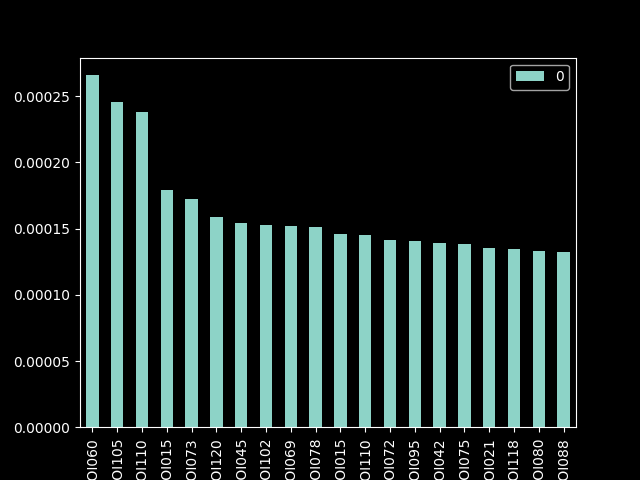

In [81]:
pdFeatureImportance=pd.DataFrame.from_dict(dFeatureImportance, orient='index')
pdFeatureImportance=pdFeatureImportance.sort_values(by=[0], ascending=False)
pdFeatureImportance.head(20).plot(kind='bar')

In [73]:
pdFeatureImportance.head(8)

,0
ROI016-ROI060,0.000294
ROI016-ROI120,0.000272
ROI034-ROI105,0.000241
ROI002-ROI015,0.000231
ROI033-ROI110,0.000209
ROI042-ROI122,0.000205
ROI018-ROI073,0.000195
ROI032-ROI110,0.000190


In [83]:
pdFeatureImportance.head(6)

,0
ROI016-ROI060,0.000266
ROI034-ROI105,0.000246
ROI033-ROI110,0.000238
ROI002-ROI015,0.000179
ROI018-ROI073,0.000172
ROI016-ROI120,0.000159


In [84]:
#sPermTest1='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/Dense47_2FeaturePermutations.p'
sPermTest1='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/Dense47_25FeaturePermutations.p'
pkl.dump(pdFeatureImportance, open(sPermTest1, 'wb'))